<a href="https://colab.research.google.com/github/martin-fabbri/colab-notebooks/blob/master/shallow_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shallow Neural Network in TensorFlow 2.0 (DEMO)

A shallow neural network that classifies MNIST digits.

_Remember to change your Runtime to GPU or TPU._

#### Checking environment

In [1]:
!nvidia-smi

Wed Sep 18 16:55:04 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

#### Load dependencies

In [0]:
import tensorflow as tf
import numpy as np

In [3]:
!pip freeze | grep tensorflow

mesh-tensorflow==0.0.5
tensorflow==1.14.0
tensorflow-estimator==1.14.0
tensorflow-hub==0.6.0
tensorflow-metadata==0.14.0
tensorflow-probability==0.7.0


In [4]:
pip install tensorflow==2.0.0-beta0

     |████████████████████████████████| 87.9MB 1.4MB/s 
     |████████████████████████████████| 501kB 43.0MB/s 
     |████████████████████████████████| 3.1MB 34.7MB/s 
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


In [0]:
import tensorflow as tf
from tensorflow import keras

In [2]:
!pip freeze | grep tensorflow

mesh-tensorflow==0.0.5
tensorflow==2.0.0b0
tensorflow-estimator==1.14.0
tensorflow-hub==0.6.0
tensorflow-metadata==0.14.0
tensorflow-probability==0.7.0


#### Load data

In [3]:
(X_train, y_train), (X_valid, y_valid) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

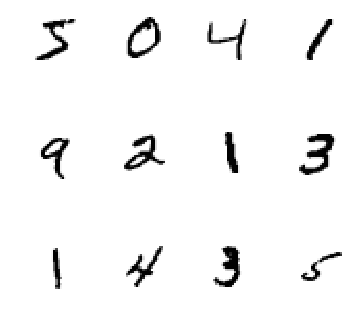

In [8]:
from matplotlib import pyplot as plt
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [9]:
X_valid.shape

(10000, 28, 28)

In [10]:
y_valid.shape

(10000,)

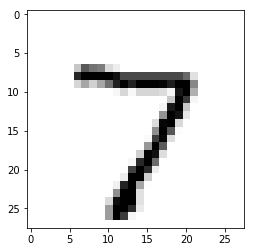

In [11]:
plt.imshow(X_valid[0], cmap="Greys")

In [12]:
X_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [13]:
y_valid[0]

7

#### Preprocess data

In [0]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [0]:
X_train /= 255
X_valid /= 255

In [16]:
X_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [0]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)

In [18]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

#### Design neural network architecture

In [0]:
model = keras.models.Sequential([
    
    keras.layers.Dense(64, activation='sigmoid', input_shape=(784,)),
    keras.layers.Dense(10, activation='softmax')
    
])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [22]:
64*784

50176

In [23]:
(64*784)+64

50240

In [24]:
(10*64)+10

650

#### Configure model

In [0]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

#### Train!

In [26]:
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0921 - accuracy: 0.1020 - val_loss: 0.0913 - val_accuracy: 0.1012
Epoch 2/200
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0909 - accuracy: 0.1030 - val_loss: 0.0905 - val_accuracy: 0.1056
Epoch 3/200
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0903 - accuracy: 0.1146 - val_loss: 0.0900 - val_accuracy: 0.1260
Epoch 4/200
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0898 - accuracy: 0.1356 - val_loss: 0.0896 - val_accuracy: 0.1514
Epoch 5/200
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0895 - accuracy: 0.1639 - val_loss: 0.0893 - val_accuracy: 0.1815
Epoch 6/200
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0891 - accuracy: 0.1975 - val_loss: 0.0889 - val_accuracy: 0.2159
Epoch 7/200
60000/60000 [=========================

#### Performing inference

In [0]:
valid_0 = X_valid[0].reshape(1, 784)

In [0]:
inference = model.predict(valid_0)

In [33]:
type(inference)

numpy.ndarray

In [37]:
np.argmax(inference)

7